# **Stage E -> Practical Time Series Analysis & Forecast**
# Name: Adeleke Adekola Emmanuel
# Hamoye ID: 188274ee0b41f000

# **Project Description**

In this quiz, we’ll explore and build time series forecasting models for measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years.

Data Set Information:

Data Link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

Notes:

1.(globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

Attribute Information:

date: Date in format dd/mm/yyyy  
time: time in format hh:mm:ss  
globalactivepower: household global minute-averaged active power (in kilowatt)  
globalreactivepower: household global minute-averaged reactive power (in kilowatt)  
voltage: minute-averaged voltage (in volt)  
global_intensity: household global minute-averaged current intensity (in ampere)  
submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).  
submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.  
submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
%matplotlib inline
from prophet import Prophet

In [ ]:
path = 'power_comp.csv'
df = pd.read_csv(path)
df.head()

<ipython-input-5-603e10eac0bc>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

# Quality Issues
1. Wrong datatype for the following columns;   
    a. Date  
    b. Time  
    c. Global_active_power  
    d. Global_reactive_power  
    e. Voltage  
    f. Global_intensity  
    g. Sub_metering_1  
    h. Sub_metering_2  
2. Column Sub_metering_3 has 25979 missing data

In [ ]:
df1 = df.copy()

In [ ]:
# Combine Date and Time columns into a new 'DateTime' column
df1['DateTime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])

# Drop the original 'Date' and 'Time' columns
df1.head()

<ipython-input-10-1b850a4bc7b8>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['DateTime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])  # Efficient combination


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [ ]:
# Convert numeric coluns to float
df1 = df1.apply(pd.to_numeric, errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   DateTime               int64  
dtypes: float64(7), int64(1)
memory usage: 126.7 MB


In [ ]:
df1.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
DateTime                     0
dtype: int64

In [ ]:
df1['DateTime'] = pd.to_datetime(df1['DateTime'], infer_datetime_format=True)
df1.info()

<ipython-input-13-53e0a5b9d5d1>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df1['DateTime'] = pd.to_datetime(df1['DateTime'], infer_datetime_format=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [ ]:
# Ffill the missing data
df1 = df1.fillna(method='ffill')
df1.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
DateTime                 0
dtype: int64

In [ ]:
df1.shape

(2075259, 8)

In [ ]:
from datetime import datetime
indf = df1.set_index(['DateTime'])
indf.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
indf.shape

(2075259, 7)

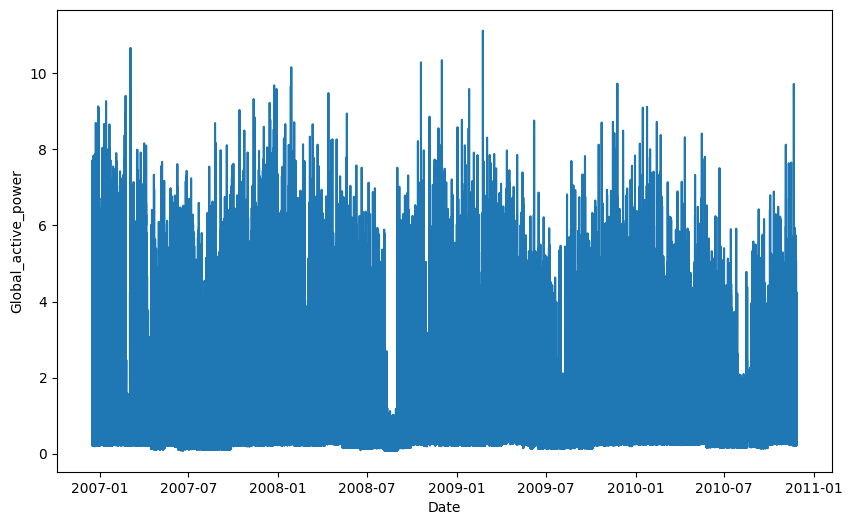

In [ ]:
plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.plot(indf['Global_active_power'])

# **The Components**

In [ ]:
import statsmodels.api as sm
from pylab import rcParams

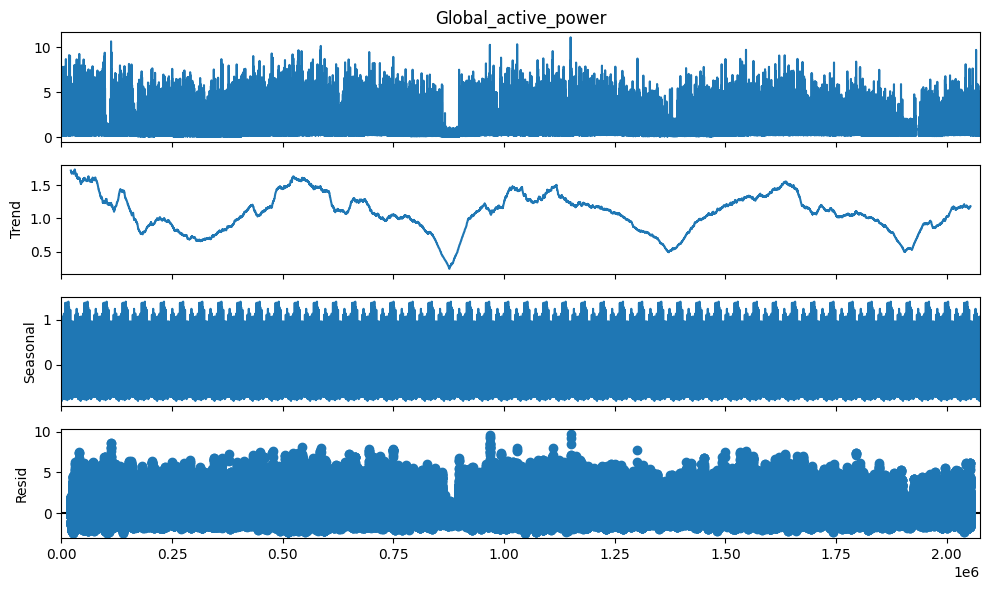

In [ ]:
rcParams['figure.figsize'] = 10, 6
decompose_series = sm.tsa.seasonal_decompose(df1['Global_active_power'], model='additive', period= (60*24*30))
decompose_series.plot()
plt.show()

# ADF test for stationarity

In [ ]:
df1_day = df1.resample('D', on='DateTime').sum()
df1_day.head()
#ADF test for stationarity

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df1_day['Global_active_power'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -3.7600523102137915
p-value: 0.0033435208887408084
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


In [ ]:
# Daily Aggeregation and Train-Test Split
daily = df1.resample('D', on='DateTime')['Global_active_power'].sum()

In [ ]:
daily.head()

DateTime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Freq: D, Name: Global_active_power, dtype: float64

In [ ]:
daily.shape

(1442,)

In [ ]:
x = len(daily)
print(x)


1442


In [ ]:
# Split to train and test
test_size =300
# Splitting based on index position
train_data = daily.iloc[: (x - test_size)]
test_data = daily.iloc[-test_size:]

print(len(train_data), len(test_data))


1142 300


In [ ]:
test_data.head()

DateTime
2010-01-31    1799.196
2010-02-01    1693.778
2010-02-02    2157.432
2010-02-03    2903.014
2010-02-04    2316.270
Freq: D, Name: Global_active_power, dtype: float64

# **Build Facebook Prophet Model**

In [ ]:

# Create DataFrames for Prophet (requires 'ds' and 'y' columns)
train_df = pd.DataFrame({'ds': train_data.index, 'y': train_data.values})
test_df = pd.DataFrame({'ds': test_data.index, 'y': test_data.values})

print(train_df.head())
print(test_df.head())

          ds         y
0 2006-12-16  1209.176
1 2006-12-17  3390.460
2 2006-12-18  2203.826
3 2006-12-19  1666.194
4 2006-12-20  2225.748
          ds         y
0 2010-01-31  1799.196
1 2010-02-01  1693.778
2 2010-02-02  2157.432
3 2010-02-03  2903.014
4 2010-02-04  2316.270


'ds': This column holds the datetime index from your Series, representing the dates for each data point.  
'y': This column holds the actual daily power consumption values from your Series.

In [ ]:
# Train the model
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq37lht8v/8skpfewe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq37lht8v/k1ywzrxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54470', 'data', 'file=/tmp/tmpq37lht8v/8skpfewe.json', 'init=/tmp/tmpq37lht8v/k1ywzrxo.json', 'output', 'file=/tmp/tmpq37lht8v/prophet_modelb3c99hhn/prophet_model-20240617201910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:19:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:19:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Make predictions

In [ ]:
# Define the prediction period (number of days for the test set)
future = model.make_future_dataframe(periods=300)

# Generate predictions for the test set
forecast = model.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1641.801341,1795.292121,2938.239297,1641.801341,1641.801341,709.612333,709.612333,709.612333,233.435831,233.435831,233.435831,476.176502,476.176502,476.176502,0.0,0.0,0.0,2351.413675
1,2006-12-17,1641.639985,1797.932033,2931.135308,1641.639985,1641.639985,701.350507,701.350507,701.350507,210.643678,210.643678,210.643678,490.706829,490.706829,490.706829,0.0,0.0,0.0,2342.990492
2,2006-12-18,1641.478629,1431.518358,2537.243311,1641.478629,1641.478629,343.478339,343.478339,343.478339,-162.600237,-162.600237,-162.600237,506.078576,506.078576,506.078576,0.0,0.0,0.0,1984.956968
3,2006-12-19,1641.317274,1568.938666,2731.179807,1641.317274,1641.317274,502.421963,502.421963,502.421963,-19.427511,-19.427511,-19.427511,521.849474,521.849474,521.849474,0.0,0.0,0.0,2143.739237
4,2006-12-20,1641.155918,1563.871647,2764.780211,1641.155918,1641.155918,523.838386,523.838386,523.838386,-13.728763,-13.728763,-13.728763,537.567149,537.567149,537.567149,0.0,0.0,0.0,2164.994303


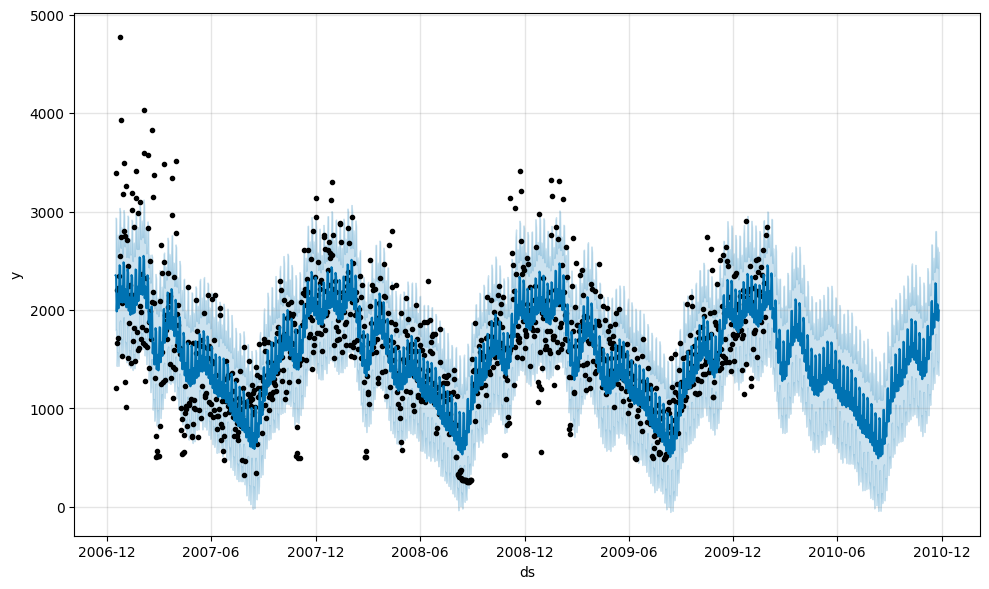

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
test_df.head()

,ds,y
0,2010-01-31,1799.196
1,2010-02-01,1693.778
2,2010-02-02,2157.432
3,2010-02-03,2903.014
4,2010-02-04,2316.270


In [ ]:
# Comparing predicted and actual result
from sklearn.metrics import mean_squared_error, mean_absolute_error
merged_df = pd.merge(forecast[['ds', 'yhat']], test_df[['ds', 'y']], how='inner', on='ds')
mse = mean_squared_error(merged_df['y'], merged_df['yhat'])
print("Mean Squared Error:", mse)

mae = mean_absolute_error(merged_df['y'], merged_df['yhat'])
print("Mean Absolute Error:", mae)



Mean Squared Error: 161289.4065673645
Mean Absolute Error: 295.3780195111622


In [160]:
rmse2 = np.sqrt(161289.4065673645)  # Calculate RMSE
print("Root Mean Squared Error:", rmse2)

Root Mean Squared Error: 401.6085240222927


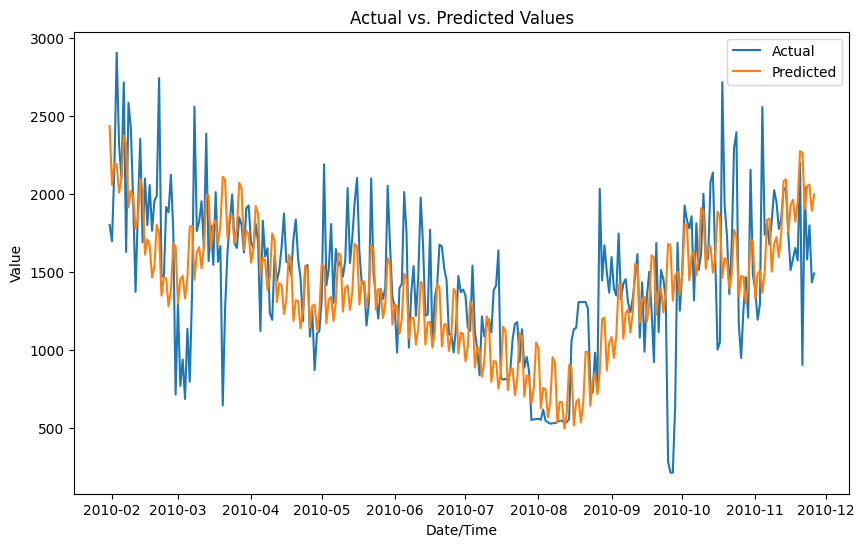

In [ ]:
# Visualizing
plt.figure(figsize=(10, 6))
plt.plot(merged_df['ds'], merged_df['y'], label='Actual')
plt.plot(merged_df['ds'], merged_df['yhat'], label='Predicted')
plt.xlabel('Date/Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# **Multivariate Time Series Forecasting with Facebook Prophet**

Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the six independent variables ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'] will be [‘add1’, ‘add2’, ‘add3’, ‘add4’, ‘add5’, ‘add6’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last 300 days of the house consumption (‘global_active_power’).

In [ ]:
df2 = df1.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [ ]:
#Create a daily sampling
df2_day = df2.resample('D', on='DateTime').sum()
df2_day.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [ ]:
#create target column and regressor
target_col = 'Global_active_power'
regressors = ['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df2_day.rename(columns=dict(zip(regressors, ['add1', 'add2', 'add3', 'add4', 'add5', 'add6'])), inplace=True)

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
regressors = ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']
X_train, X_test, y_train, y_test = train_test_split(df2_day[regressors], df2_day[target_col], test_size=0.21, random_state=42)

# **Facebook bold text Prophet Model**

In [ ]:
# Create the Prophet Model
model2 = Prophet()

# Add regressors
for regressor in regressors:
  model2.add_regressor(regressor)

In [ ]:
# Use the training data to fit the model
# Rename columns to match Prophet's expectations
train_df2 = X_train.merge(y_train.to_frame(name='y'), how='inner', left_index=True, right_index=True)
train_df2 = train_df2.reset_index().rename(columns={'DateTime': 'ds'})  # Rename date column

model2.fit(train_df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq37lht8v/835ew_9a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq37lht8v/arz2pgrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39450', 'data', 'file=/tmp/tmpq37lht8v/835ew_9a.json', 'init=/tmp/tmpq37lht8v/arz2pgrk.json', 'output', 'file=/tmp/tmpq37lht8v/prophet_modely00kpxlp/prophet_model-20240618000419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:04:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:04:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Define the future dates for prediction
future_dates = model.make_future_dataframe(periods=300, freq='D')

# Generate predictions for the future dates
forecast_df = model.predict(future_dates)

In [ ]:
forecast_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1641.801341,1773.418451,2915.626609,1641.801341,1641.801341,709.612333,709.612333,709.612333,233.435831,233.435831,233.435831,476.176502,476.176502,476.176502,0.0,0.0,0.0,2351.413675
1,2006-12-17,1641.639985,1734.351431,2883.036961,1641.639985,1641.639985,701.350507,701.350507,701.350507,210.643678,210.643678,210.643678,490.706829,490.706829,490.706829,0.0,0.0,0.0,2342.990492
2,2006-12-18,1641.478629,1396.039218,2556.929248,1641.478629,1641.478629,343.478339,343.478339,343.478339,-162.600237,-162.600237,-162.600237,506.078576,506.078576,506.078576,0.0,0.0,0.0,1984.956968
3,2006-12-19,1641.317274,1609.100657,2715.926627,1641.317274,1641.317274,502.421963,502.421963,502.421963,-19.427511,-19.427511,-19.427511,521.849474,521.849474,521.849474,0.0,0.0,0.0,2143.739237
4,2006-12-20,1641.155918,1557.167591,2748.469605,1641.155918,1641.155918,523.838386,523.838386,523.838386,-13.728763,-13.728763,-13.728763,537.567149,537.567149,537.567149,0.0,0.0,0.0,2164.994303


In [ ]:
# Merge predictions with actual test data
# Ensure the date column in y_test is named 'ds'
merged_df2 = pd.merge(forecast_df[['ds', 'yhat']],
                     y_test.to_frame(name=target_col).rename_axis('ds').reset_index(), # Rename the index to 'ds'
                     how='inner', on='ds')

In [ ]:
# Calculate errors
mse2 = mean_squared_error(merged_df2[target_col], merged_df2['yhat'])
mae2 = mean_absolute_error(merged_df2[target_col], merged_df2['yhat'])

print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)

Mean Squared Error: 190715.7719243769
Mean Absolute Error: 324.91325668644373


In [ ]:
rmse2 = np.sqrt(mse2)  # Calculate RMSE
print("Root Mean Squared Error:", rmse2)

Root Mean Squared Error: 436.71016924772533


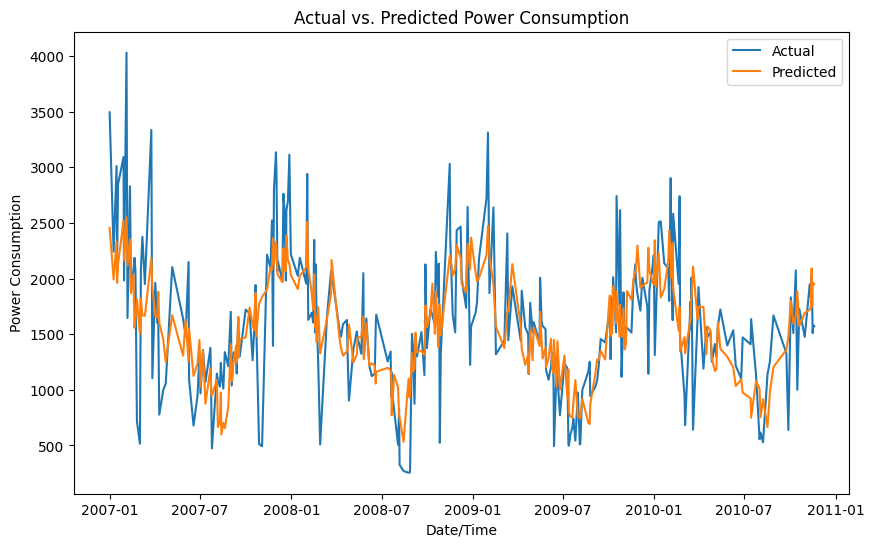

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(merged_df2['ds'], merged_df2[target_col], label='Actual')
plt.plot(merged_df2['ds'], merged_df2['yhat'], label='Predicted')
plt.xlabel('Date/Time')
plt.ylabel('Power Consumption')
plt.title('Actual vs. Predicted Power Consumption')
plt.legend()
plt.show()

# Conclusion
Able to predict the power consumption by household using Time Series Model.